In [45]:
import pandas as pd 
disasters_df = pd.read_csv('../Data/merged_df.csv')

In [46]:
disasters_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI
0,Afghanistan,1956.0,0.021669,397.5075,34.56N,70.05E,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
1,Afghanistan,1956.0,0.021669,397.5075,34.56N,70.05E,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
2,Afghanistan,1956.0,0.021669,397.5075,34.56N,70.05E,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
3,Afghanistan,1956.0,0.021669,397.5075,34.56N,70.05E,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
4,Afghanistan,1956.0,0.021669,397.5075,34.56N,70.05E,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532


In [47]:
population_df = pd.read_csv('../Data/populations.csv')
population_df.head()

,pop2025,pop2050,country,area,landAreaKm,cca2,cca3,density,growthRate,worldPercentage,rank
0,1463870000,1679590000,India,3287590.0,2973190.0,IN,IND,492.3567,0.0089,0.1829,1
1,1416100000,1260290000,China,9706961.0,9424702.9,CN,CHN,150.2541,-0.0023,0.1769,2
2,347276000,380847000,United States,9372610.0,9147420.0,US,USA,37.9644,0.0054,0.0434,3
3,285721000,320713000,Indonesia,1904569.0,1877519.0,ID,IDN,152.1801,0.0079,0.0357,4
4,255220000,371864000,Pakistan,881912.0,770880.0,PK,PAK,331.0762,0.0157,0.0319,5


In [48]:
dist_disasters = disasters_df['Disaster Type'].nunique()
dist_disasters

10

In [49]:
unique_values = disasters_df['Country'].nunique()
unique_values

31

In [50]:
relevant_disasters = ['Flood', 'Drought', 'Earthquake', 'Insect infestation', 'Storm',
       'Wildfire', 'Landslide', 'Extreme temperature ',
       'Mass movement (dry)', 'Volcanic activity']
df_disasters = disasters_df[disasters_df["Disaster Type"].isin(relevant_disasters)]

# Step 2: Group by Country and Disaster Type
df_disaster_counts = df_disasters.groupby(["Country", "Disaster Type"])["Total Events"].sum().unstack(fill_value=0).reset_index()

In [51]:
# Assuming df_disaster_counts is already created from your disaster data
# Merge on 'Country' and 'country' (case-insensitive match)
df_disaster_counts["Country_lower"] = df_disaster_counts["Country"].str.lower()
population_df["country_lower"] = population_df["country"].str.lower()

# Merge the population data
merged_df = pd.merge(df_disaster_counts, 
                     population_df[["country_lower", "pop2025"]], 
                     left_on="Country_lower", 
                     right_on="country_lower", 
                     how="left")

# Clean up
merged_df.drop(columns=["Country_lower", "country_lower"], inplace=True)


In [52]:
merged_df.head()

,Country,Drought,Earthquake,Extreme temperature,Flood,Insect infestation,Landslide,Mass movement (dry),Storm,Volcanic activity,Wildfire,pop2025
0,Afghanistan,24.0,153.0,24.0,108.0,12.0,45.0,0.0,48.0,0.0,12.0,43844100
1,Angola,48.0,0.0,0.0,105.0,0.0,12.0,0.0,0.0,0.0,0.0,39040000
2,Australia,72.0,48.0,0.0,480.0,48.0,48.0,0.0,504.0,0.0,216.0,26974000
3,Bangladesh,12.0,60.0,60.0,84.0,0.0,36.0,0.0,204.0,0.0,0.0,175687000
4,Brazil,432.0,144.0,288.0,1296.0,72.0,432.0,0.0,1062.0,0.0,216.0,212812000


In [53]:
merged_df.isnull().sum()

Country                 0
Drought                 0
Earthquake              0
Extreme temperature     0
Flood                   0
Insect infestation      0
Landslide               0
Mass movement (dry)     0
Storm                   0
Volcanic activity       0
Wildfire                0
pop2025                 0
dtype: int64

In [54]:
merged_df.to_csv('../Data/cluster_df.csv', index=False)

In [55]:
df = pd.read_csv("../Data/cluster_df.csv")

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset
df = pd.read_csv("../Data/cluster_df.csv")  # Replace with the correct path

# Step 1: Prepare features and scale
X = df.drop(columns=["Country"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
df["Disaster_Cluster"] = kmeans.fit_predict(X_scaled)

# Step 3: Assign descriptive labels to clusters
cluster_labels = {
    0: "Low Disaster Activity",
    1: "Flood & Storm Dominant",
    2: "Moderate Disaster Profile",
    3: "Earthquake Prone",
    4: "Volcanic Countries",
    5: "Wildfire & Heat Prone",
    6: "Floods & Droughts Mix",
    7: "Minimal Disasters",
    8: "Flood-Drought-Earthquake Mix",
    9: "Balanced Moderate Activity"
}

df["Cluster_Label"] = df["Disaster_Cluster"].map(cluster_labels)

# Step 4: View clustered countries
clustered_countries = df[["Country", "Disaster_Cluster", "Cluster_Label"]].sort_values("Disaster_Cluster")

# Optional: Save to CSV
clustered_countries.to_csv("../Data/clustered_countries_Kmeans.csv", index=False)

# Preview
print(clustered_countries.head(10))


        Country  Disaster_Cluster              Cluster_Label
23         Peru                 0      Low Disaster Activity
6         Chile                 0      Low Disaster Activity
19       Mexico                 0      Low Disaster Activity
9         Egypt                 0      Low Disaster Activity
4        Brazil                 1     Flood & Storm Dominant
0   Afghanistan                 2  Moderate Disaster Profile
28     Thailand                 2  Moderate Disaster Profile
27        Spain                 2  Moderate Disaster Profile
25      Somalia                 2  Moderate Disaster Profile
18        Kenya                 2  Moderate Disaster Profile


<ipython-input-58-1c0120bcc392>:23: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.



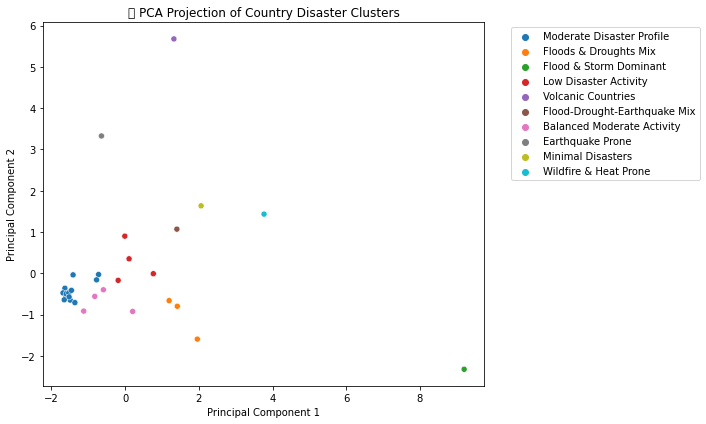

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Drop country and scale features
X = df.drop(columns=["Country", "Disaster_Cluster", "Cluster_Label"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster_Label", palette="tab10")
plt.title("📉 PCA Projection of Country Disaster Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [59]:
import plotly.express as px

# Make sure country names are compatible (ISO or standard full names)
fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Cluster_Label",
                    title="🌍 Country Clustering Based on Disaster Exposure",
                    color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(legend_title_text='Disaster Cluster')
fig.show()


In [60]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Use the scaled data you clustered (X_scaled) and predicted labels
silhouette = silhouette_score(X_scaled, df["Disaster_Cluster"])
db_index = davies_bouldin_score(X_scaled, df["Disaster_Cluster"])
ch_index = calinski_harabasz_score(X_scaled, df["Disaster_Cluster"])

print(f"🔍 Silhouette Score         : {silhouette:.4f}")
print(f"🔍 Davies-Bouldin Index     : {db_index:.4f}")
print(f"🔍 Calinski-Harabasz Index  : {ch_index:.2f}")

🔍 Silhouette Score         : 0.3565
🔍 Davies-Bouldin Index     : 0.4998
🔍 Calinski-Harabasz Index  : 31.13


## population added

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("../Data/cluster_df.csv")  # Make sure 'pop2025' is included

# Select disaster features + population
features = ['Drought', 'Earthquake', 'Extreme temperature ', 'Flood', 'Insect infestation',
            'Landslide', 'Mass movement (dry)', 'Storm', 'Volcanic activity', 'Wildfire', 'pop2025']
X = df[features]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # KMeans clustering
# kmeans = KMeans(n_clusters=5, random_state=42)
# df["Cluster_with_population"] = kmeans.fit_predict(X_scaled)

# # 📌 Optional: Assign meaningful labels to clusters (based on average disaster type per cluster)
# cluster_profiles = df.groupby("Cluster_with_population")[features].mean()

# # Manually map cluster numbers to descriptive labels after inspecting the profiles
# # (Example logic: label by dominant disaster type or population)
# cluster_labels_map = {
#     0: "Flood & Earthquake Prone",
#     1: "Low Disaster & Low Population",
#     2: "Storm & Wildfire Dominant",
#     3: "High Population Mixed Risk",
#     4: "Heat & Drought Affected"
# }

# df["Cluster_Label"] = df["Cluster_with_population"].map(cluster_labels_map)

In [62]:
# silhouette = silhouette_score(X_scaled, df["Cluster_with_population"])
# db_index = davies_bouldin_score(X_scaled, df["Cluster_with_population"])
# ch_index = calinski_harabasz_score(X_scaled, df["Cluster_with_population"])

# print(f"\n🔍 Evaluation Metrics:")
# print(f"Silhouette Score        : {silhouette:.4f}")
# print(f"Davies-Bouldin Index    : {db_index:.4f}")
# print(f"Calinski-Harabasz Index : {ch_index:.2f}")

In [63]:
# # 📊 Visualize cluster profiles
# plt.figure(figsize=(12, 6))
# sns.heatmap(cluster_profiles, annot=True, fmt=".1f", cmap="YlOrBr")
# plt.title("🔥 Cluster Profiles by Disaster Type + Population")
# plt.ylabel("Cluster Number")
# plt.xlabel("Feature")
# plt.tight_layout()
# plt.show()

In [64]:
# # 🎨 Optional PCA for visualization
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X_scaled)
# df["PCA1"] = pca_result[:, 0]
# df["PCA2"] = pca_result[:, 1]

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster_Label", palette="tab10", s=100)
# plt.title("🌍 Country Clusters (PCA Projection)")
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.legend(title="Cluster Label")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [65]:
# import plotly.express as px

# # 🌍 World map visualization using Plotly
# fig = px.choropleth(
#     df,
#     locations="Country",  # column with country names
#     locationmode="country names",
#     color="Cluster_Label",  # your labeled clusters
#     title="🌍 Country Clustering Based on Disaster Exposure and Population",
#     color_discrete_sequence=px.colors.qualitative.Set3,
#     hover_name="Country",  # shows country name on hover
# )

# fig.update_layout(
#     legend_title_text="Disaster Cluster",
#     geo=dict(showframe=False, showcoastlines=True),
# )
# fig.show()


### Agglomerative clustering 

In [66]:
from sklearn.cluster import AgglomerativeClustering

features = ['Drought', 'Earthquake', 'Extreme temperature ', 'Flood', 'Insect infestation',
            'Landslide', 'Mass movement (dry)', 'Storm', 'Volcanic activity', 'Wildfire', 'pop2025']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
agg = AgglomerativeClustering(n_clusters=5)
df["Agglo_Cluster"] = agg.fit_predict(X_scaled)

# Evaluation
print("🔍 Evaluation:")
print("Silhouette Score       :", silhouette_score(X_scaled, df["Agglo_Cluster"]))
print("Davies-Bouldin Index   :", davies_bouldin_score(X_scaled, df["Agglo_Cluster"]))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, df["Agglo_Cluster"]))

🔍 Evaluation:
Silhouette Score       : 0.35782290329611044
Davies-Bouldin Index   : 0.8980544506062603
Calinski-Harabasz Score: 12.641792198843854


In [67]:
cluster_summary = df.groupby("Agglo_Cluster")[features].mean().reset_index()

cluster_labels_map = {
    0: "Flood Dominant",
    1: "Storm & Wildfire Prone",
    2: "Low Disaster Risk",
    3: "Heat & Drought Regions",
    4: "Earthquake Zones"
}
df["Cluster_Label"] = df["Agglo_Cluster"].map(cluster_labels_map)


<ipython-input-68-261010f1f7a2>:16: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.

c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



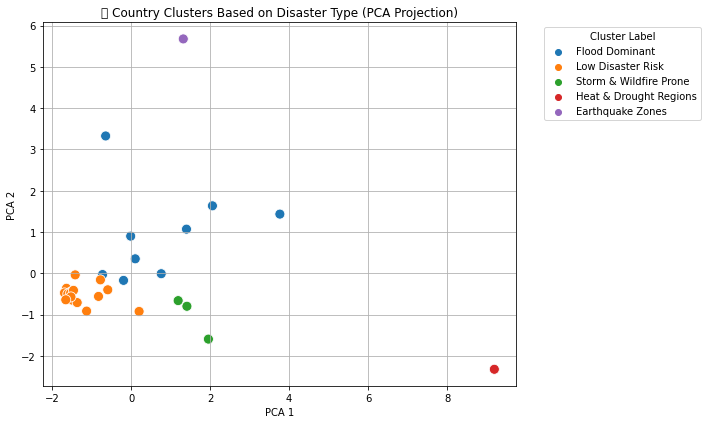

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster_Label", palette="tab10", s=100)
plt.title("🌍 Country Clusters Based on Disaster Type (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [69]:
import plotly.express as px

fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Cluster_Label",
                    title="🌍 Country Clustering Based on Disaster Exposure",
                    color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(legend_title_text='Disaster Cluster')
fig.show()


<ipython-input-70-a24ef1483665>:6: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.



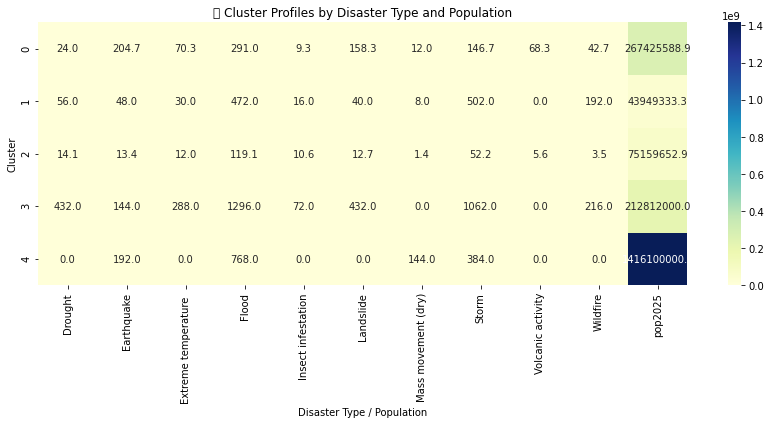

In [70]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.set_index("Agglo_Cluster"), cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("🔥 Cluster Profiles by Disaster Type and Population")
plt.xlabel("Disaster Type / Population")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# GMM Clustering
gmm = GaussianMixture(n_components=5, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X_scaled)

# Manually assign labels (customize based on cluster profiling if needed)
gmm_labels_map = {
    0: "Flood Dominant",
    1: "Storm & Wildfire Prone",
    2: "Low Disaster Risk",
    3: "Heat & Drought Regions",
    4: "Earthquake Zones"
}
df["Cluster_Label"] = df["GMM_Cluster"].map(gmm_labels_map)

In [73]:
# Evaluation metrics
silhouette = silhouette_score(X_scaled, df["GMM_Cluster"])
db_index = davies_bouldin_score(X_scaled, df["GMM_Cluster"])
ch_index = calinski_harabasz_score(X_scaled, df["GMM_Cluster"])

print(f"\n🔍 GMM Evaluation:")
print(f"Silhouette Score        : {silhouette:.4f}")
print(f"Davies-Bouldin Index    : {db_index:.4f}")
print(f"Calinski-Harabasz Index : {ch_index:.2f}")


🔍 GMM Evaluation:
Silhouette Score        : 0.4952
Davies-Bouldin Index    : 0.5875
Calinski-Harabasz Index : 12.52


<ipython-input-74-0cb378bc18c7>:13: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.

c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



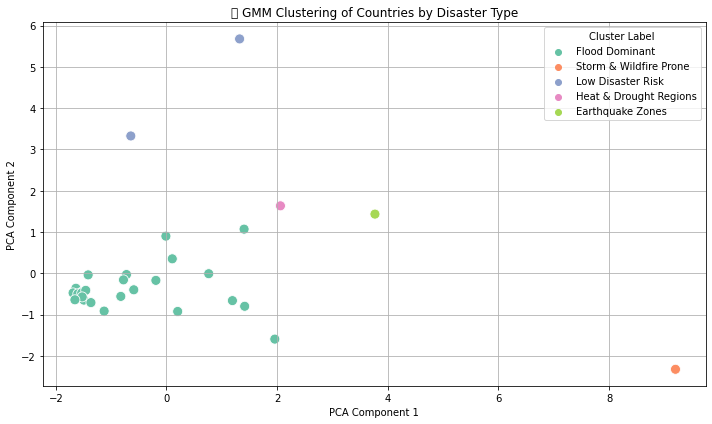

In [74]:
# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster_Label", palette="Set2", s=100)
plt.title("🌍 GMM Clustering of Countries by Disaster Type")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster Label")
plt.show()

In [75]:
import plotly.express as px

# 🌍 Plot clusters on world map
fig = px.choropleth(
    df,
    locations="Country",  # Make sure these are valid country names
    locationmode="country names",
    color="Cluster_Label",
    title="🌎 Global Clustering of Countries Based on Disaster Exposure (GMM)",
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(
    legend_title_text='Disaster Cluster',
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular')
)

fig.show()



🔍 K-Means Clustering Evaluation:
Silhouette Score        : 0.3815
Davies-Bouldin Index    : 0.9004
Calinski-Harabasz Index : 13.07


<ipython-input-77-f81cb2bb2ddb>:28: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.



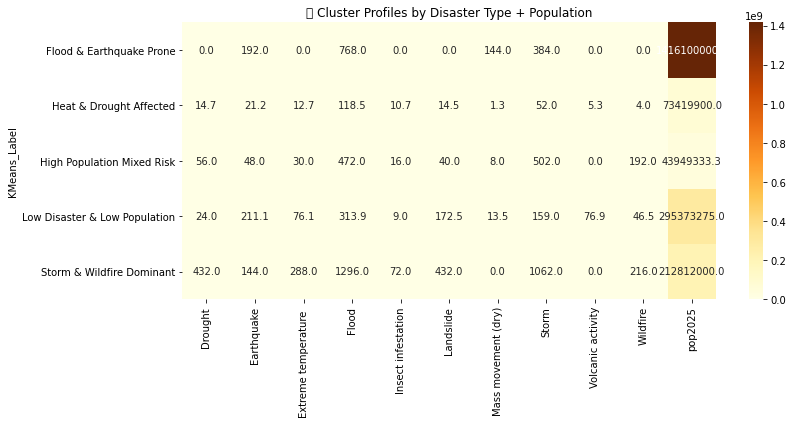

<ipython-input-77-f81cb2bb2ddb>:41: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.

c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



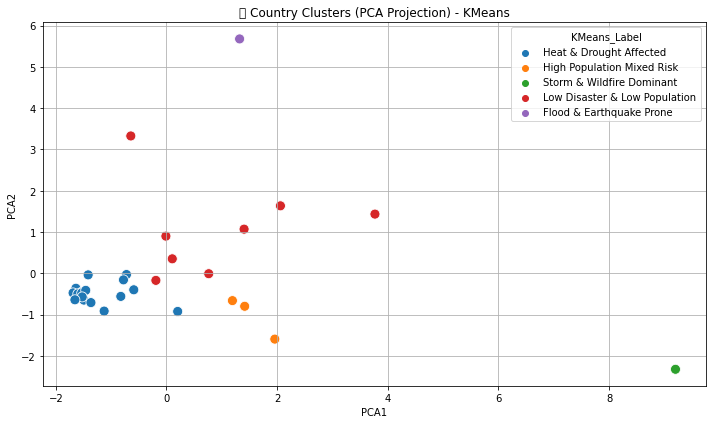

In [77]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)
# Assign labels (based on domain analysis)
cluster_labels_map = {
    0: "Flood & Earthquake Prone",
    1: "Low Disaster & Low Population",
    2: "Storm & Wildfire Dominant",
    3: "High Population Mixed Risk",
    4: "Heat & Drought Affected"
}
df["KMeans_Label"] = df["KMeans_Cluster"].map(cluster_labels_map)

# Evaluation (no function)
silhouette = silhouette_score(X_scaled, df["KMeans_Cluster"])
db_index = davies_bouldin_score(X_scaled, df["KMeans_Cluster"])
ch_index = calinski_harabasz_score(X_scaled, df["KMeans_Cluster"])

print("\n🔍 K-Means Clustering Evaluation:")
print(f"Silhouette Score        : {silhouette:.4f}")
print(f"Davies-Bouldin Index    : {db_index:.4f}")
print(f"Calinski-Harabasz Index : {ch_index:.2f}")

# Cluster profiles
cluster_profiles = df.groupby("KMeans_Label")[features].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles, annot=True, fmt=".1f", cmap="YlOrBr")
plt.title("🔥 Cluster Profiles by Disaster Type + Population")
plt.tight_layout()
plt.show()

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="KMeans_Label", palette="tab10", s=100)
plt.title("🌍 Country Clusters (PCA Projection) - KMeans")
plt.grid(True)
plt.tight_layout()
plt.show()

# Choropleth world map
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="KMeans_Label",
    title="🌍 Country Clustering Based on Disaster Exposure & Population (KMeans)",
    color_discrete_sequence=px.colors.qualitative.Set3,
    hover_name="Country"
)
fig.update_layout(legend_title_text="Disaster Cluster")
fig.show()

In [78]:
# Save final clustering results to CSV
# This will include PCA columns, cluster assignments, and labels
df.to_csv("../Data/clustering_results.csv", index=False)

print("✅ Clustering results saved to '../Data/clustering_results.csv'")

✅ Clustering results saved to '../Data/clustering_results.csv'
